<a href="https://colab.research.google.com/github/ahoorarstmn/PyTorch_DL_FaraDars/blob/main/PyTorch_Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Augmentation**











In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

plt.rcParams["savefig.bbox"] = 'tight'

In [ ]:
def visualize(imgs, **imshow_kwargs):
    fig, axs = plt.subplots(1, len(imgs), figsize=(15, 15))
    for row_idx, row in enumerate([imgs]):
        for col_idx, img in enumerate(row):
            ax = axs[col_idx] 
            ax.imshow(np.asarray(img))
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    plt.tight_layout()

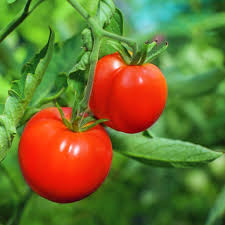

In [ ]:
img_path = r"/content/drive/MyDrive/Colab Notebooks/FaraDars PyTorch/images/tomato.jpg"
original_img = Image.open(img_path)
original_img

## Non-Random Transforms

### Pad

useful parameters:
* `padding(int or sequence`)
* `fill(number or tuple)`
* `padding_mode(str)`

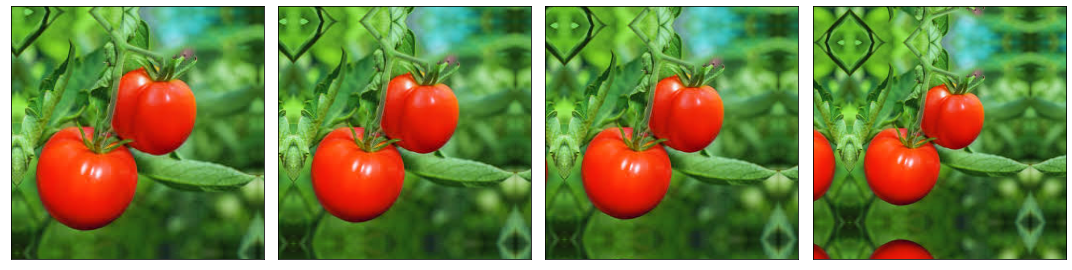

In [ ]:
padded_imgs = [transforms.Pad(padding=padding, padding_mode='reflect')(original_img) for padding in (5, 15, 20, 45)]
visualize(padded_imgs)

### Resize

useful parameters:
* `size(sequence or int)`
* `interpolation`

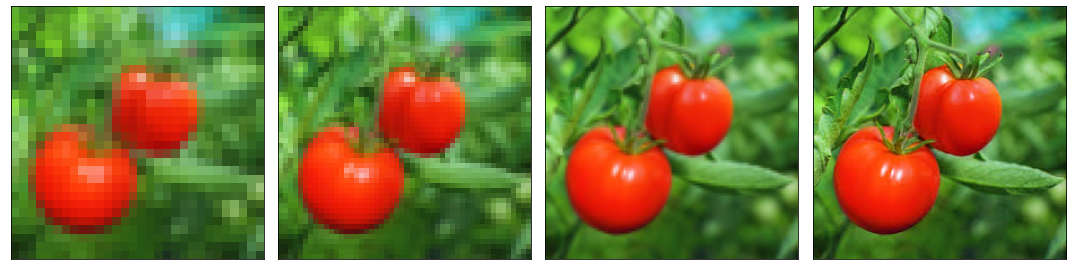

In [ ]:
resized_imgs = [transforms.Resize(size=size)(original_img) for size in (30, 50, 100, original_img.size)]
visualize(resized_imgs)

### CenterCrop

useful parameters:
* `size(sequence or int)`

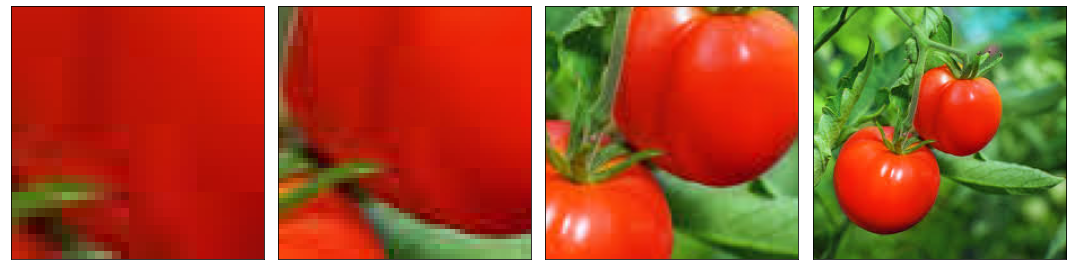

In [ ]:
centercrop_imgs = [transforms.CenterCrop(size=size)(original_img) for size in (30, 50, 100, original_img.size)]
visualize(centercrop_imgs)

### FiveCrop

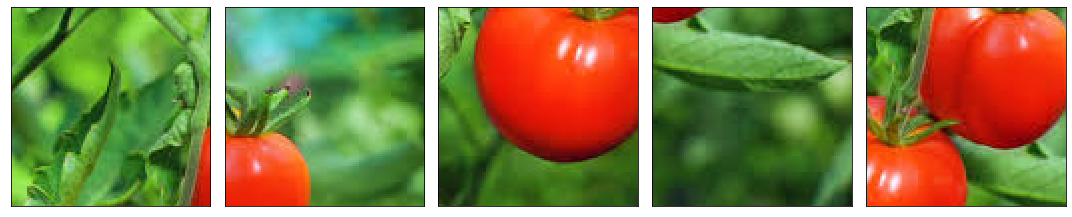

In [ ]:
(top_left, top_right, bottom_left, bottom_right, center) = transforms.FiveCrop(size=(100, 100))(original_img)
visualize([top_left, top_right, bottom_left, bottom_right, center])

### Grayscale

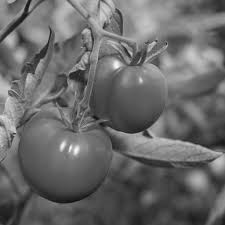

In [ ]:
gray_img = transforms.Grayscale()(original_img)
gray_img

## Random Transforms

### ColorJitter

useful parameters:
* `brightness`
* `contrast`
* `saturation`
* `hue`

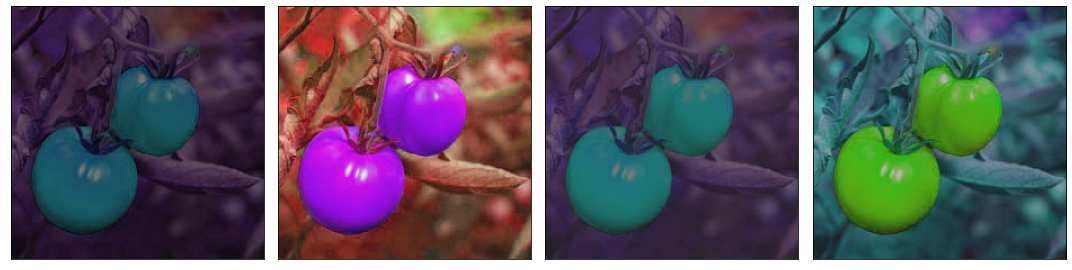

In [ ]:
jitter_transform = transforms.ColorJitter(brightness=0.5, 
                                          contrast=0.5, 
                                          saturation=0.5, 
                                          hue=0.5)
jitted_imgs = [jitter_transform(original_img) for _ in range(4)]
visualize(jitted_imgs)

### RandomPerspective

useful parameters:
* `distortion_scale`
* `p`
* `interpolation`
* `fill`

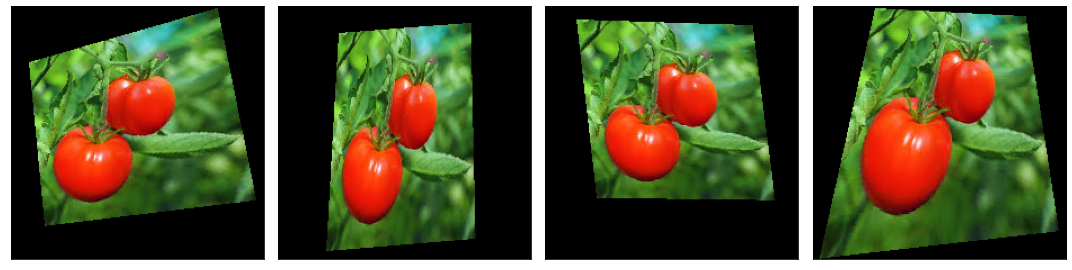

In [ ]:
from torchvision.transforms.transforms import InterpolationMode
rand_persp = transforms.RandomPerspective(distortion_scale=0.5,
                                          p=1.0, 
                                          interpolation=InterpolationMode.NEAREST)
perspective_imgs = [rand_persp(original_img) for _ in range(4)]
visualize(perspective_imgs)

### RandomRotation

useful parameters:
* `degrees`
* `interpolation`
* `expand`
* `center`
* `fill`

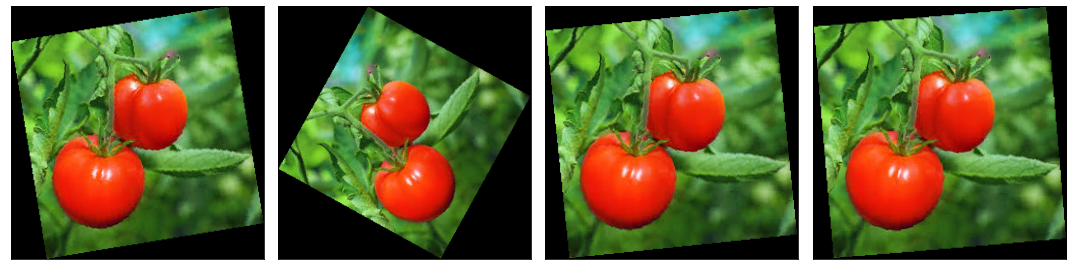

In [ ]:
rotated_imgs = [transforms.RandomRotation(degrees=(0, 90), expand=True)(original_img) for _ in range(4)]
visualize(rotated_imgs)

### RandomCrop

useful parameters:
* `size`
* `padding`

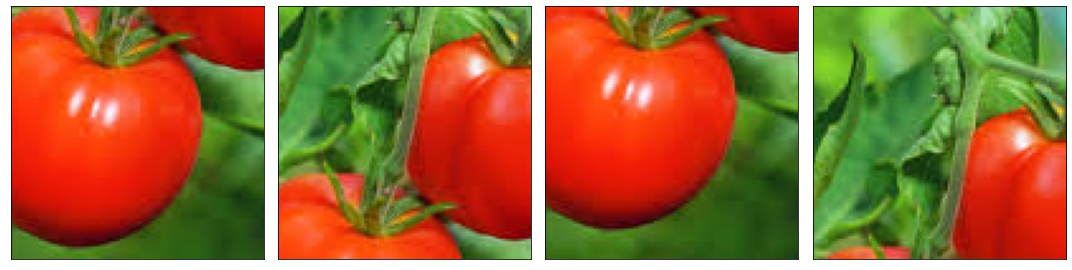

In [ ]:
randcropped_imgs = [transforms.RandomCrop(size=(100, 100))(original_img) for _ in range(4)]
visualize(randcropped_imgs)

### RandomVerticalFlip

useful parameters:
* `p`

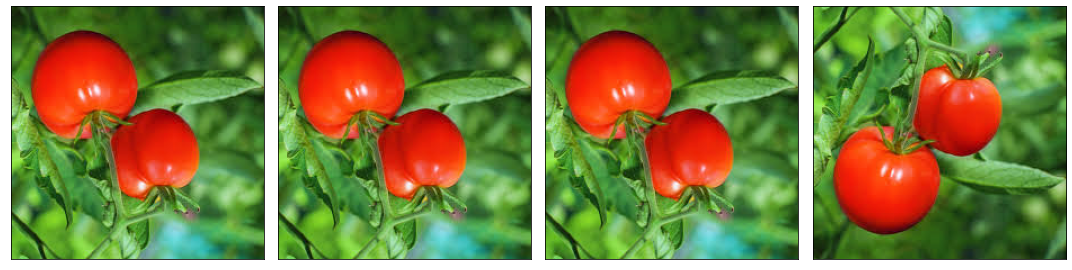

In [ ]:
vflipped_imgs = [transforms.RandomVerticalFlip(p=0.5)(original_img) for _ in range(4)]
visualize(vflipped_imgs)

## AutoAugment

### RandAugment

useful parameters:

* `num_ops`
* `magnitude`

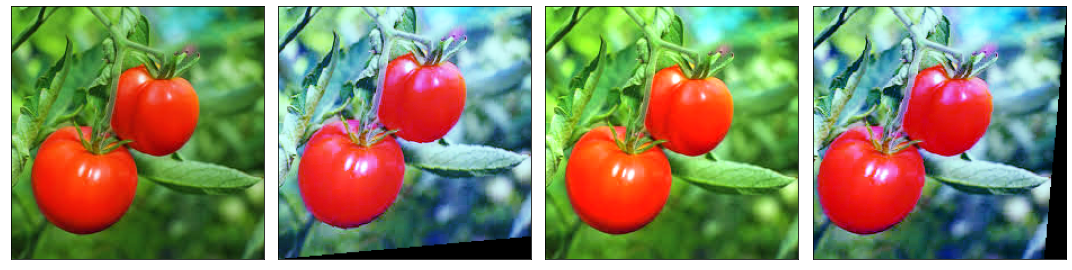

In [ ]:
randaug_imgs = [transforms.RandAugment()(original_img) for _ in range(4)]
visualize(randaug_imgs)

### AugMix

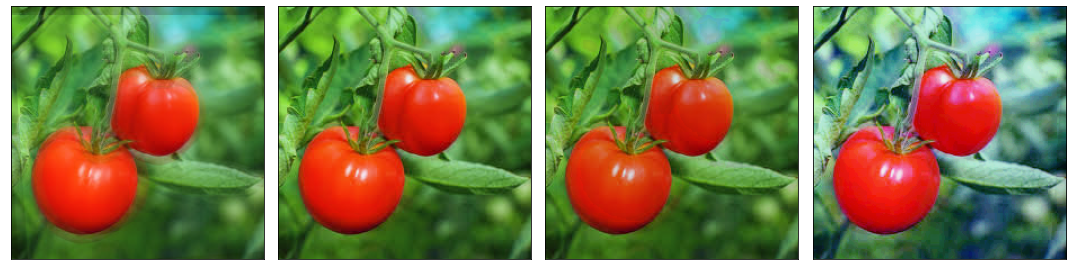

In [ ]:
augmix_imgs = [transforms.AugMix()(original_img) for _ in range(4)]
visualize(augmix_imgs)